# `X_num` Sub-Models

### Importing Packages

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.externals import joblib
from sklearn.preprocessing import label_binarize
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_rows", 2000)

### Importing `sklearn` packages

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import log_loss

# Loading the data

## Loading Files

- X = X_num
- X_train = X_num_train
- X_test = X_num_test
- y
- y_train
- y_test

In [3]:
X = pd.read_pickle('Pickled_Files/X_num.pickle')

In [4]:
X.head(2)

,bathrooms,bedrooms,price,num_photos,num_features,description_length,latitude,longitude,manager_bin_1,manager_bin_2,manager_bin_3,manager_bin_4,manager_bin_5,month_bin_1,month_bin_2,month_bin_3
0,1.5,3,3000.0,5,0,95,40.7145,-73.9425,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1,2250.0,5,1,63,40.7216,-73.9423,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
X.shape

(49352, 16)

In [6]:
X_train = pd.read_pickle('Pickled_Files/X_num_train.pickle')

In [7]:
X_train.head(2)

,bathrooms,bedrooms,price,num_photos,num_features,description_length,latitude,longitude,manager_bin_1,manager_bin_2,manager_bin_3,manager_bin_4,manager_bin_5,month_bin_1,month_bin_2,month_bin_3
28154,-0.422954,-0.486604,-0.436072,1.585803,0.412179,-1.254871,40.7473,-73.9736,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6321,-0.422954,0.409878,-0.759282,-0.144227,0.670406,1.912565,40.8376,-73.9443,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
X_train.shape

(39481, 16)

In [9]:
X_test = pd.read_pickle('Pickled_Files/X_num_test.pickle')

In [10]:
X_test.head(2)

,bathrooms,bedrooms,price,num_photos,num_features,description_length,latitude,longitude,manager_bin_1,manager_bin_2,manager_bin_3,manager_bin_4,manager_bin_5,month_bin_1,month_bin_2,month_bin_3
25981,-0.424202,0.415873,-0.360558,2.278481,-0.118749,1.549312,40.7968,-73.9486,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48891,-0.424202,0.415873,-0.170920,0.200289,0.397740,0.799301,40.7447,-73.9741,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
X_test.shape

(9871, 16)

In [12]:
y = np.load('Pickled_Files/y.npy')

In [13]:
y, y.shape

(array([2, 1, 1, ..., 2, 1, 2]), (49352,))

In [14]:
y_train = np.load('Pickled_Files/y_train.npy')

In [15]:
y_train, y_train.shape

(array([1, 1, 2, ..., 0, 1, 1]), (39481,))

In [16]:
y_test = np.load('Pickled_Files/y_test.npy')

In [17]:
y_test, y_test.shape

(array([1, 1, 1, ..., 2, 2, 1]), (9871,))

### Ensemble Helper Functions

In [18]:
def evaluate_model(model):
    
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    y_hat = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    y_hat_proba = model.predict_proba(X_train)
    y_pred_proba = model.predict_proba(X_test)
    
    return {'model': model,
            'X': X,
            'X_test': X_test,
            'X_train': X_train,
            'y': y,
            'y_test': y_test,
            'y_train': y_train,
            'y_hat': y_hat,
            'y_pred': y_pred,
            'y_hat_proba': y_hat_proba,
            'y_pred_proba': y_pred_proba,
            'train_score': train_score,
            'test_score': test_score
           }

In [19]:
def model_summary(model, data_dictionary):
    
    class_rpt = classification_report(data_dictionary['y_test'], data_dictionary['y_pred'])
    log_loss_score_train = log_loss(data_dictionary['y_train'], data_dictionary['y_hat_proba'])
    log_loss_score_test = log_loss(data_dictionary['y_test'], data_dictionary['y_pred_proba'])
    
    print ("Model Summary Report:\n")
    print (model)
    print ("\n")
    print ("Classification Report:\n")
    print (class_rpt)
    print ("Accuracy on training set: {:4f}".format(model.score(data_dictionary['X_train'], 
                                                                data_dictionary['y_train'])))
    
    print ("Accuracy on test set:     {:4f}".format(model.score(data_dictionary['X_test'], 
                                                            data_dictionary['y_test'])))
    print ("\n")
    print ("Log Loss on training set: {:4f}".format(log_loss_score_train))
    print ("Log Loss on test set:     {:4f}".format(log_loss_score_test))

In [20]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='label')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        y : array-like, shape = [n_samples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

Initializing a global dictionary to store the various models for later retrieval

In [21]:
X_num_models = {}

## `X_num` Sub-Models

### Model 1 - Logistic Regression w/Lasso

In [22]:
clf1 = LogisticRegression(penalty='l2',
                          C=0.001,
                          n_jobs=-1,
                          random_state=82
                         )

In [23]:
X_num_clf1_dictionary = evaluate_model(clf1)

In [24]:
model_summary(clf1, X_num_clf1_dictionary)

Model Summary Report:

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=82, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Classification Report:

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       775
          1       0.70      0.99      0.82      6834
          2       0.34      0.02      0.03      2262

avg / total       0.56      0.69      0.57      9871

Accuracy on training set: 0.694283
Accuracy on test set:     0.691521


Log Loss on training set: 0.727144
Log Loss on test set:     0.731976


### Tuning Model 1 via GridSearch

In [25]:
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
          'penalty': ['l2']
         }

gs_clf1 = GridSearchCV(clf1,
                       params, 
                       n_jobs=-1,
                       cv=10,
                       verbose=1
                      )

In [26]:
X_num_gs_clf1_dictionary = evaluate_model(gs_clf1)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   14.3s finished


In [27]:
model_summary(gs_clf1, X_num_gs_clf1_dictionary)

Model Summary Report:

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=82, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)


Classification Report:

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       775
          1       0.69      1.00      0.82      6834
          2       0.00      0.00      0.00      2262

avg / total       0.48      0.69      0.57      9871

Accuracy on training set: 0.695144
Accuracy on test set:     0.692230


Log Loss on training set: 0.763923
Log Loss on test 

/Users/nate_velarde/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
X_num_models['gs_clf1'] = {'model': gs_clf1.best_estimator_,
                           'best_params': gs_clf1.best_params_,
                           'score': gs_clf1.best_score_
                          }

In [29]:
X_num_models['gs_clf1']

{'best_params': {'C': 0.0001, 'penalty': 'l2'},
 'model': LogisticRegression(C=0.0001, class_weight=None, dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=82,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
 'score': 0.69514449988602112}

### Extracting Important Features

In [30]:
X_num_features = pd.DataFrame(X.columns.tolist(), columns=["Feature"])
X_num_features

,Feature
0,bathrooms
1,bedrooms
2,price
3,num_photos
4,num_features
5,description_length
6,latitude
7,longitude
8,manager_bin_1
9,manager_bin_2


In [31]:
gs_clf1.best_estimator_.coef_

array([[-0.03401295,  0.01305567, -0.12314121,  0.02540443, -0.01554341,
         0.01000465, -0.01394578,  0.0258831 ,  0.00409298,  0.01372112,
         0.00049419,  0.00034657, -0.01941762,  0.01203872,  0.00042568,
        -0.01322716],
       [ 0.05051203, -0.08717825,  0.23897486, -0.06492948, -0.0511896 ,
        -0.07214659,  0.00571749, -0.00800477,  0.02993973, -0.04891621,
        -0.0136993 , -0.01047713,  0.04355815, -0.01870796,  0.00264195,
         0.01647125],
       [-0.04119491,  0.06796215, -0.15279572,  0.05028571,  0.062809  ,
         0.06986472, -0.00815486,  0.01198973, -0.03378621,  0.03776591,
         0.01362862,  0.01038244, -0.02847825,  0.008659  , -0.00323618,
        -0.00591031]])

In [32]:
gs_clf1.best_estimator_.coef_.shape

(3, 16)

In [33]:
log_reg_gs_features = pd.DataFrame({'coef_low': gs_clf1.best_estimator_.coef_[1],
                                    'coef_medium': gs_clf1.best_estimator_.coef_[2],
                                    'coef_high': gs_clf1.best_estimator_.coef_[0],
                                    'Feature': X_num_features['Feature'].values
                                   })

log_reg_gs_features

,Feature,coef_high,coef_low,coef_medium
0,bathrooms,-0.034013,0.050512,-0.041195
1,bedrooms,0.013056,-0.087178,0.067962
2,price,-0.123141,0.238975,-0.152796
3,num_photos,0.025404,-0.064929,0.050286
4,num_features,-0.015543,-0.051190,0.062809
5,description_length,0.010005,-0.072147,0.069865
6,latitude,-0.013946,0.005717,-0.008155
7,longitude,0.025883,-0.008005,0.011990
8,manager_bin_1,0.004093,0.029940,-0.033786
9,manager_bin_2,0.013721,-0.048916,0.037766


In [34]:
log_reg_gs_features['high_abs_coef'] = log_reg_gs_features['coef_high'].apply(lambda x: abs(x))
log_reg_gs_features['low_abs_coef'] = log_reg_gs_features['coef_low'].apply(lambda x: abs(x))
log_reg_gs_features['med_abs_coef'] = log_reg_gs_features['coef_medium'].apply(lambda x: abs(x))

log_reg_gs_features.sort_values(by='high_abs_coef', ascending=False)

,Feature,coef_high,coef_low,coef_medium,high_abs_coef,low_abs_coef,med_abs_coef
2,price,-0.123141,0.238975,-0.152796,0.123141,0.238975,0.152796
0,bathrooms,-0.034013,0.050512,-0.041195,0.034013,0.050512,0.041195
7,longitude,0.025883,-0.008005,0.011990,0.025883,0.008005,0.011990
3,num_photos,0.025404,-0.064929,0.050286,0.025404,0.064929,0.050286
12,manager_bin_5,-0.019418,0.043558,-0.028478,0.019418,0.043558,0.028478
4,num_features,-0.015543,-0.051190,0.062809,0.015543,0.051190,0.062809
6,latitude,-0.013946,0.005717,-0.008155,0.013946,0.005717,0.008155
9,manager_bin_2,0.013721,-0.048916,0.037766,0.013721,0.048916,0.037766
15,month_bin_3,-0.013227,0.016471,-0.005910,0.013227,0.016471,0.005910
1,bedrooms,0.013056,-0.087178,0.067962,0.013056,0.087178,0.067962


In [35]:
# joblib.dump(gs_clf1, 'Pickled_Files/X_num_Sub_Models/X_num_gs_clf1.pickle')

## Model 2 - Decision Tree Classifier

In [36]:
clf2 = DecisionTreeClassifier(max_depth=3,
                              criterion='entropy',
                              random_state=82
                             )

In [37]:
X_num_clf2_dictionary = evaluate_model(clf2)

In [38]:
model_summary(clf2, X_num_clf2_dictionary)

Model Summary Report:

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=82, splitter='best')


Classification Report:

             precision    recall  f1-score   support

          0       0.35      0.14      0.20       775
          1       0.70      0.98      0.82      6834
          2       0.00      0.00      0.00      2262

avg / total       0.51      0.69      0.58      9871

Accuracy on training set: 0.699805
Accuracy on test set:     0.692432


Log Loss on training set: 0.729781
Log Loss on test set:     0.743597


### Tuning Model 2 via GridSearch

In [39]:
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}

gs_clf2 = GridSearchCV(clf2,
                       params, 
                       n_jobs=-1,
                       cv=10,
                       verbose=1
                      )

In [40]:
X_num_gs_clf2_dictionary = evaluate_model(gs_clf2)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 242 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   34.0s finished


In [41]:
model_summary(gs_clf2, X_num_gs_clf2_dictionary)

Model Summary Report:

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=82, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [2, 5], 'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, 5], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)


Classification Report:

             precision    recall  f1-score   support

          0       0.44      0.11      0.18       775
          1       0.71      0.98      0.82      6834
          2       0.41      0.04      0.08      2262

avg / total       0.62      0.70      0.60      987

In [42]:
X_num_models['gs_clf2'] = {'model': gs_clf2.best_estimator_,
                           'best_params': gs_clf2.best_params_,
                           'score': gs_clf2.best_score_
                          }

In [43]:
X_num_models['gs_clf2']

{'best_params': {'criterion': 'entropy',
  'max_depth': 5,
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'splitter': 'best'},
 'model': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=82, splitter='best'),
 'score': 0.70330032167371648}

## Model 2: Extracting Feature Importance

In [44]:
gs_clf2.best_estimator_.feature_importances_

array([ 0.        ,  0.18061866,  0.48711475,  0.20211951,  0.05351736,
        0.00747622,  0.01236749,  0.05313785,  0.        ,  0.        ,
        0.        ,  0.00364816,  0.        ,  0.        ,  0.        ,  0.        ])

In [45]:
model2_fi = pd.DataFrame({'Feature_Importance': gs_clf2.best_estimator_.feature_importances_,
                          'Feature': X_num_features['Feature'].values
                         })

model2_fi.sort_values(by='Feature_Importance', ascending=False)

,Feature,Feature_Importance
2,price,0.487115
3,num_photos,0.202120
1,bedrooms,0.180619
4,num_features,0.053517
7,longitude,0.053138
6,latitude,0.012367
5,description_length,0.007476
11,manager_bin_4,0.003648
0,bathrooms,0.000000
8,manager_bin_1,0.000000


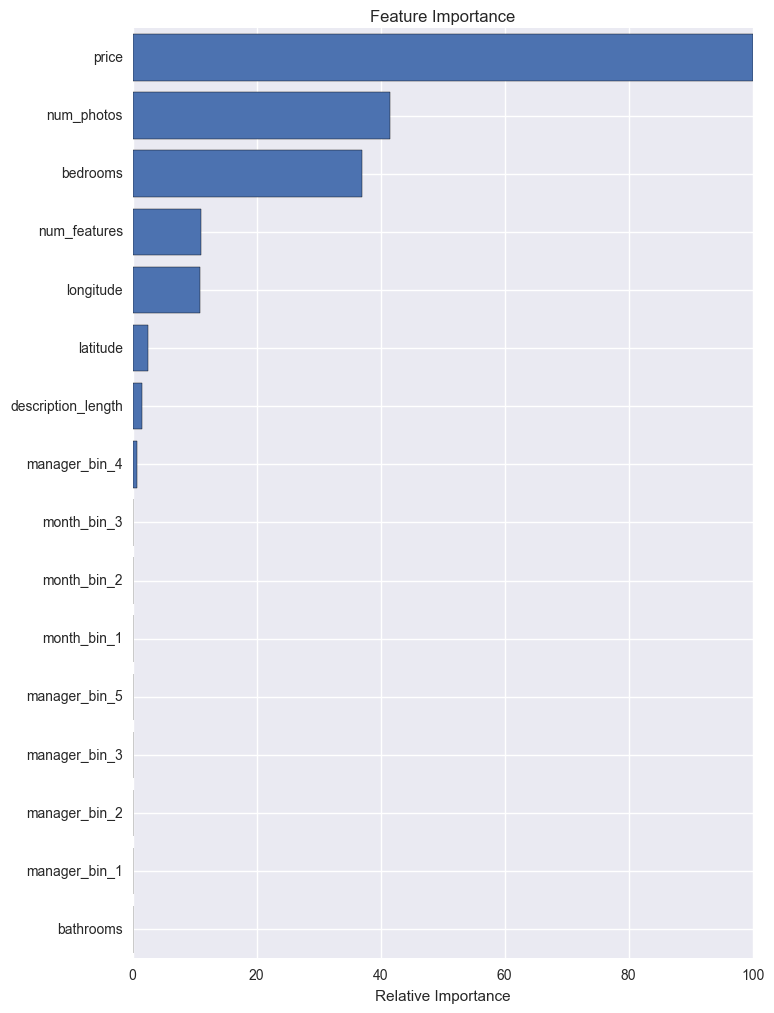

In [46]:
feature_importance = gs_clf2.best_estimator_.feature_importances_

feature_importance = 100.0 * (feature_importance / 
                              feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pvals = feature_importance[sorted_idx]
pcols = X.columns[sorted_idx]
plt.figure(figsize=(8,12))
plt.barh(pos, pvals, align='center')
plt.yticks(pos, pcols)
plt.xlabel('Relative Importance')
plt.title('Feature Importance')

**Interesting to see differences in feature selection between Logistic Regression and Decision Tree Classifier**

In [47]:
# joblib.dump(gs_clf2, 'Pickled_Files/X_num_Sub_Models/X_num_gs_clf2.pickle')

## Model 3 - Gradient Boosting Classifier

In [48]:
clf3 = GradientBoostingClassifier(max_depth=1,
                                  learning_rate=0.01,
                                  random_state=82
                                 )

In [49]:
X_num_clf3_dictionary = evaluate_model(clf3)

In [50]:
model_summary(clf3, X_num_clf3_dictionary)

Model Summary Report:

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=82,
              subsample=1.0, verbose=0, warm_start=False)


Classification Report:

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       775
          1       0.69      1.00      0.82      6834
          2       0.00      0.00      0.00      2262

avg / total       0.48      0.69      0.57      9871

Accuracy on training set: 0.695271
Accuracy on test set:     0.692331


Log Loss on training set: 0.779040
Log Loss on test set:     0.784553


### Tuning Model 3 via GridSearch

In [51]:
params = {'max_depth': [1, 3],
          'learning_rate': [0.01, 0.10, 1.0]
         }

gs_clf3 = GridSearchCV(clf3,
                       params, 
                       n_jobs=-1,
                       cv=10,
                       verbose=1
                      )

In [52]:
X_num_gs_clf3_dictionary = evaluate_model(gs_clf3)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.2min finished


In [53]:
model_summary(gs_clf3, X_num_gs_clf3_dictionary)

Model Summary Report:

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=82,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [1, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)


Classification Report:

             precision    recall  f1-score   support

          0       0.42      0.23      0.30       775
          1       0.79      0.91      0.84      6834
          2       0.45      0.30      0.36      2262

avg / total       0.68      

In [54]:
X_num_models['gs_clf3'] = {'model': gs_clf3.best_estimator_,
                           'best_params': gs_clf3.best_params_,
                           'score': gs_clf3.best_score_
                          }

In [55]:
X_num_models['gs_clf3']

{'best_params': {'learning_rate': 1.0, 'max_depth': 3},
 'model': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=1.0, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_split=1e-07, min_samples_leaf=1,
               min_samples_split=2, min_weight_fraction_leaf=0.0,
               n_estimators=100, presort='auto', random_state=82,
               subsample=1.0, verbose=0, warm_start=False),
 'score': 0.7248803221802893}

In [56]:
# joblib.dump(gs_clf3, 'Pickled_Files/X_num_Sub_Models/X_num_gs_clf3.pickle')

## Model 3: Extracting Feature Importance

In [57]:
gs_clf3.best_estimator_.feature_importances_

array([ 0.01712488,  0.0500237 ,  0.19289515,  0.04244995,  0.08555003,
        0.1040972 ,  0.23409585,  0.19751947,  0.01153679,  0.01691846,
        0.01249596,  0.00717744,  0.00845904,  0.00524095,  0.00590462,
        0.0085105 ])

In [58]:
model3_fi = pd.DataFrame({'Feature_Importance': gs_clf3.best_estimator_.feature_importances_,
                          'Feature': X_num_features['Feature'].values
                         })

model3_fi.sort_values(by='Feature_Importance', ascending=False)

,Feature,Feature_Importance
6,latitude,0.234096
7,longitude,0.197519
2,price,0.192895
5,description_length,0.104097
4,num_features,0.085550
1,bedrooms,0.050024
3,num_photos,0.042450
0,bathrooms,0.017125
9,manager_bin_2,0.016918
10,manager_bin_3,0.012496


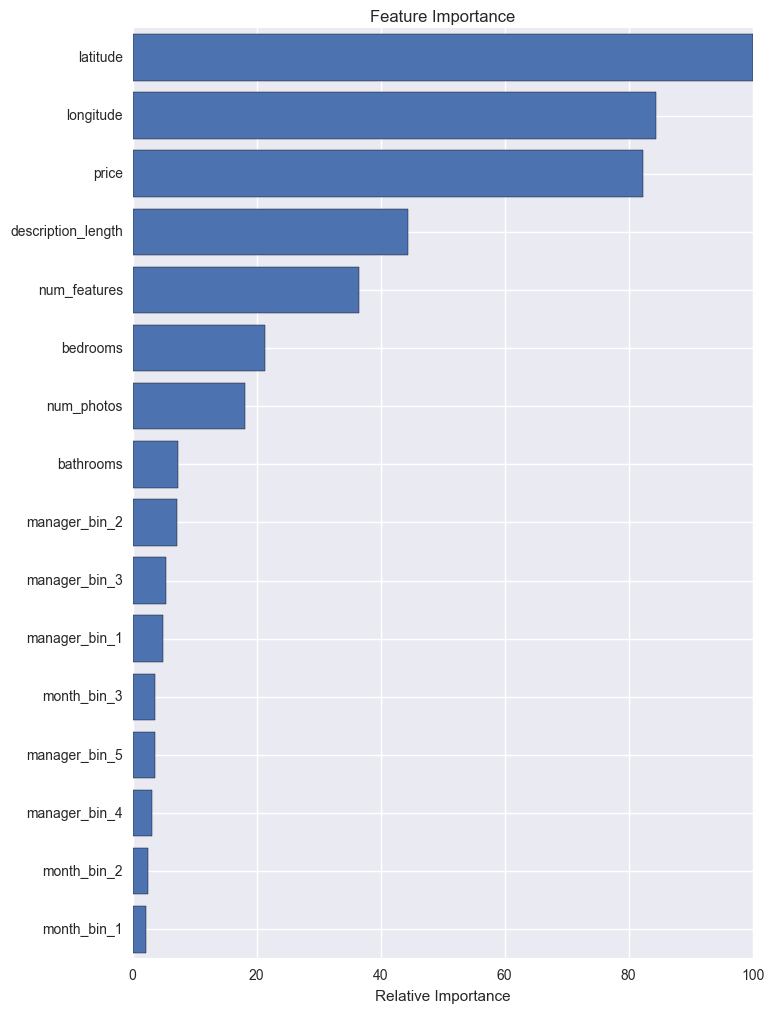

In [59]:
feature_importance = gs_clf3.best_estimator_.feature_importances_

feature_importance = 100.0 * (feature_importance / 
                              feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pvals = feature_importance[sorted_idx]
pcols = X.columns[sorted_idx]
plt.figure(figsize=(8,12))
plt.barh(pos, pvals, align='center')
plt.yticks(pos, pcols)
plt.xlabel('Relative Importance')
plt.title('Feature Importance')

## Majority Voting

In [60]:
clf_labels = ['Logistic Regression', 'Decision Tree Classifier', 'Gradient Boosting Classifier']

mv_clf = MajorityVoteClassifier(classifiers=[X_num_models['gs_clf1']['model'],
                                             X_num_models['gs_clf2']['model'],
                                             X_num_models['gs_clf3']['model']
                                             ])

clf_labels += ['Majority Voting']

all_clf = [X_num_models['gs_clf1']['model'],
            X_num_models['gs_clf2']['model'],
            X_num_models['gs_clf3']['model'],
            mv_clf
          ]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.6951 (+/- 0.0003) [Logistic Regression]
Accuracy: 0.7033 (+/- 0.0029) [Decision Tree Classifier]
Accuracy: 0.7249 (+/- 0.0066) [Gradient Boosting Classifier]
Accuracy: 0.7088 (+/- 0.0051) [Majority Voting]


In [61]:
clf_labels = ['Logistic Regression', 'Decision Tree Classifier', 'Gradient Boosting Classifier']

mv_clf = MajorityVoteClassifier(classifiers=[X_num_models['gs_clf1']['model'],
                                             X_num_models['gs_clf2']['model'],
                                             X_num_models['gs_clf3']['model']
                                             ])

clf_labels += ['Majority Voting']

all_clf = [X_num_models['gs_clf1']['model'],
            X_num_models['gs_clf2']['model'],
            X_num_models['gs_clf3']['model'],
            mv_clf
          ]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='neg_log_loss')
    
    print("Negative Log Loss: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))

Negative Log Loss: -0.7655 (+/- 0.0010) [Logistic Regression]
Negative Log Loss: -0.7070 (+/- 0.0126) [Decision Tree Classifier]
Negative Log Loss: -0.6342 (+/- 0.0082) [Gradient Boosting Classifier]
Negative Log Loss: -0.6577 (+/- 0.0038) [Majority Voting]


**MISC NOTES**

**Can call the model, `X_num_models['gs_clf1']['model']` - for use in majority voting below**

**How to Load in a Pickled Model**